# Example Functions for Paul

## evaluate_regression
- simple function, gets requested metrics and displays table

In [3]:
## Simple function:
# evaluate_regression will get the metrics from metric list and display them in a dataframe
def evaluate_regression(y_true, y_pred, metrics=['r2','rmse','mae'], show_results=False):
    """Calculates and displays any of the following evaluation metrics: (passed as strings in metrics param)
    r2, MAE,MSE,RMSE
    """
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    import numpy as np
    from bs_ds import list2df
    import inspect    
    import functions_combined_BEST as ji

    ## Make a list to receive metric results
    results=[['Metric','Value']]
    metric_list = []
    
    ## make default list of metrics if none provided
    if metrics is None: 
        metrics=['r2','rmse','u']
    
    ## Make all input lowercase (for testing metric name)
    else:
        metrics = [m.lower() for m in metrics]
    
    for metric in metrics:
        if 'r2'in metric: #'r2' in metrics: #any(m in metrics for m in ('r2','r squared','R_squared'))
            r2 = r2_score(y_true, y_pred)
            results.append(['R Squared',r2])##f'R\N{SUPERSCRIPT TWO}',r2])
        
        if 'rmse' in metric:
            RMSE = np.sqrt(mean_squared_error(y_true,y_pred))
            results.append(['Root Mean Squared Error',RMSE])

        if 'mse' in metric:
            MSE = mean_squared_error(y_true,y_pred)
            results.append(['Mean Squared Error',MSE])

        if 'mae' in metric:
            MAE = mean_absolute_error(y_true,y_pred)
            results.append(['Mean Absolute Error',MAE])

    results_df = pd.DataFrame(results[1:],columns=results[0])
    results_df.set_index('Metric', inplace=True)
    
    if show_results:
        from IPython.display import display
        
        ## round resulst to 3 cecimals, hide the index, and set a caption
        dfs = results_df.round(3).reset_index().style.hide_index().set_caption('Evaluation Metrics')
        display(dfs)
    
    return results_df.round(4)

### Example Use of evaluate_regression

In [1]:
import bs_ds as bs
from bs_ds.imports import *

## Load in a csv of my model true vs predicted data
file_url = 'https://raw.githubusercontent.com/jirvingphd/dsc-5-capstone-project-online-ds-ft-021119/master/results/model1/model1_df_model_true_vs_preds.csv'
df = pd.read_csv(file_url,index_col=0, parse_dates=True)

y_test = df['true_test_price'].dropna()
y_test_pred =  df['pred_from_gen'].dropna()

df.head()

bs_ds  v0.8.9 loaded.  Read the docs: https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules use: from bs_ds.imports import *



Package,Handle,Description
bs_ds,bs,Custom data science bootcamp student package
matplotlib,mpl,Matplotlib's base OOP module with formatting artists
matplotlib.pyplot,plt,Matplotlib's matlab-like plotting module
numpy,np,scientific computing with Python
pandas,pd,High performance data structures and tools
seaborn,sns,High-level data visualization library based on matplotlib


In [4]:
evaluate_regression(y_test,y_test_pred)

,Value
Metric,
R Squared,0.6124
Root Mean Squared Error,0.4823
Mean Squared Error,0.2327
Mean Absolute Error,0.3550


# Larger Model Evaluation Report function
- `evaluate_classification_model`

- More complex function calling on several other functions to produce an aesthetically pleasing report

- evaluate_classication_model:
    -Takes a Keras model, its history, and your X_train,X_test,y_train,y_test data it will:
    1. plot the model history 
    2. display the classification_report from sklearn
    3. plot the confusion matrix

## Functions For Classification Evaluation
- def evaluate_classification_model
- def plot_keras_history
- def plot_confusion_matrix

In [20]:
## More complex function calling on several other functions to produce an aesthetically pleasing report
## evaluate_classication_model:
# Takes a Keras model, its history, and your X_train,X_test,y_train,y_test data
# it will 1) plot the model history, 2) display the classification_report from sklearn,3) plot the confusion matrix
def evaluate_classification_model(model, history, X_train,X_test,y_train,y_test, binary_classes=True,
                                  conf_matrix_classes= ['Decrease','Increase'], normalize_conf_matrix=True,
                                  conf_matrix_figsize=(8,4), save_conf_matrix_png=False,
                                  conf_mat_filename= 'results/confusion_matrix.png',
                                  save_history=False, history_filename ='results/keras_history.png',
                                  save_summary=False, summary_filename = 'results/model_summary.txt'):

    """Evaluates kera's model's performance, plots model's history,displays classification report,
    and plots a confusion matrix. 
    conf_matrix_classes are the labels for the matrix. [negative, positive]
    Returns df of classification report and fig object for  confusion matrix's plot."""

    from sklearn.metrics import roc_auc_score, roc_curve, classification_report,confusion_matrix
    import bs_ds as bs
    import functions_combined_BEST as ji
    from IPython.display import display
    import pandas as pd
    import matplotlib as mpl
    numFmt = '.4f'
    num_dashes = 30

    
    print('---'*num_dashes)
    print('\tTRAINING HISTORY:')
    print('---'*num_dashes)
    
    ## PLOT HISTORY
    plot_keras_history( history,filename_base=history_filename, save_fig=save_history,title_text='')

    
    print('\n')
    print('---'*num_dashes)
    print('\tEVALUATE MODEL:')
    print('---'*num_dashes)

    
    ## Evaluate model
    print('\n- Evaluating Training Data:')
    loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=True)
    print(f'    - Accuracy:{accuracy_train:{numFmt}}')
    print(f'    - Loss:{loss_train:{numFmt}}')

    print('\n- Evaluating Test Data:')
    loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=True)
    print(f'    - Accuracy:{accuracy_test:{numFmt}}')
    print(f'    - Loss:{loss_test:{numFmt}}\n')


    ## Get model predictions
    y_hat_train = model.predict_classes(X_train)
    y_hat_test = model.predict_classes(X_test)

    
    ## If doing multiclassification, compress classes back to single column
    if binary_classes==False:
        y_train = y_train.argmax(axis=1)
        y_test = y_test.argmax(axis=1)
    

    print('---'*num_dashes)
    print('\tCLASSIFICATION REPORT:')
    print('---'*num_dashes)

    ## Get sklearn classification report 
    report_str = classification_report(y_test,y_hat_test)
    report_dict = classification_report(y_test,y_hat_test,output_dict=True)
    
    ## Create and display classification report
    df_report =pd.DataFrame.from_dict(report_dict,orient='index')#class_rows,orient='index')
    df_report.reset_index(inplace=True)
    
    display(df_report.round(4).style.hide_index().set_caption('Classification Report'))
    print('\n')    

    ## Create and plot confusion_matrix
    conf_mat = confusion_matrix(y_test, y_hat_test)
    
    fig = plot_confusion_matrix(conf_mat,classes=conf_matrix_classes,
                                   normalize=normalize_conf_matrix, fig_size=conf_matrix_figsize)
    if save_conf_matrix_png:
        fig.savefig(conf_mat_filename,facecolor='white', format='png', frameon=True)
        
        
    ## if saving the model.summary() printout 
    if save_summary:
        with open(summary_filename,'w') as f:
            model.summary(print_fn=lambda x: f.write(x+"\n"))
            f.write(f"\nSaved at {time_suffix}\n")
            f.write(report_str)

    return df_report, fig



def plot_keras_history(history, title_text='',fig_size=(6,6),save_fig=False,no_val_data=False, filename_base='results/keras_history'):
    """Plots the history['acc','val','val_acc','val_loss']"""
    import functions_combined_BEST as ji

    metrics = ['acc','loss','val_acc','val_loss']

    import matplotlib.pyplot as plt
    import matplotlib as mpl
    
    plot_metrics={}
    for metric in metrics:
        if metric in history.history.keys():
            plot_metrics[metric] = history.history[metric]

    # Set font styles:
    fontDict = {
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'title':{
            'fontsize':14,
            'fontweight':'normal',
            'ha':'center',
            }
        }
    # x = range(1,len(acc)+1)
    
    ## If there is only acc and loss to plot, plot on 1 graph
    if no_val_data == True:

        fig_size = (fig_size[0],fig_size[1]//2)
        fig, ax = plt.subplots(figsize=fig_size)

        for k,v in plot_metrics.items():
            if 'acc' in k:
                color='b'
                label = 'Accuracy'
            if 'loss' in k:
                color='r'
                label = 'Loss'
            ax.plot(range(len(v)),v, label=label,color=color)
                
        plt.title('Model Training History')    
        fig.suptitle(title_text,y=1.01,**fontDict['title'])
        
        ax.set_xlabel('Training Epoch',**fontDict['xlabel'])
        ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))

        plt.legend()
        plt.show()
    
    ## if theres val_acc and val_loss, plot on subplots
    else:
        ## CREATE SUBPLOTS
        fig,ax = plt.subplots(nrows=2, ncols=1, figsize=fig_size, sharex=True)
        
        # Set color scheme for data type
        color_dict = {'val':'red','default':'b'}
        
        # Title Subplots
        fig.suptitle(title_text,y=1.01,**fontDict['title'])
        ax[1].set_xlabel('Training Epoch',**fontDict['xlabel'])

        ## Set plot params by metric and data type
        for metric, data in plot_metrics.items():
            x = range(1,len(data)+1)
            ## SET AXIS AND LABEL BY METRIC TYPE
            if 'acc' in metric.lower():            
                ax_i = 0
                metric_title = 'Accuracy'
            
            elif 'loss' in metric.lower():
                ax_i=1
                metric_title = 'Loss'

            ## SET COLOR AND LABEL PREFIX BY DATA TYPE
            if 'val' in metric.lower():
                color = color_dict['val']
                data_label = 'Validation '+metric_title

            else:
                color = color_dict['default']
                data_label='Training ' + metric_title
            
            ## PLOT THE CURRENT METRIC AND LABEL
            ax[ax_i].plot(x, data, color=color,label=data_label)
            ax[ax_i].set_ylabel(metric_title,**fontDict['ylabel'])
            ax[ax_i].legend()

        plt.tight_layout()
        plt.show()
    
    if save_fig:
        if '.' not in filename_base:
            filename = filename_base+'.png'
        else:
            filename = filename_base
        fig.savefig(filename,facecolor='white', format='png', frameon=True)

        print(f'[io] Figure saved as {filename}')
    return fig, ax


def plot_confusion_matrix(conf_matrix, classes = None, normalize=False,
                          title='Confusion Matrix', cmap=None,
                          print_raw_matrix=False,fig_size=(5,5), show_help=False):
    """Check if Normalization Option is Set to True. If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.
    Note: Taken from bs_ds and modified
    i.e.:
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plot_confusion_matrix(conf_matrix, classes=['Class','Labels'],
    normalize=True, )
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt

    cm = conf_matrix
    ## Set plot style properties
    if cmap==None:
        cmap = plt.get_cmap("Blues")

    ## Text Properties
    fmt = '.2f' if normalize else 'd'

    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',   
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }


    ## Normalize data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()
    
    if classes is None:
        classes = ['negative','positive']
        
    tick_marks = np.arange(len(classes))


    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

    
    # Determine threshold for b/w text
    thresh = cm.max() / 2.

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, format(cm[i, j], fmt),
                 color='darkgray',
                 **fontDict['data_labels'])#color="white" if cm[i, j] > thresh else "black"

    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])
    
    plt.tight_layout()
    fig = plt.gcf()
    plt.show()
    
    if print_raw_matrix:
        print_title = 'Raw Confusion Matrix Counts:'
        print('\n',print_title)
        print(conf_matrix)

    if show_help:
        print('''For binary classifications:
        [[0,0(true_neg),  0,1(false_pos)]
        [1,0(false_neg), 1,1(true_pos)] ]
        
        to get vals as vars:
        >>  tn,fp,fn,tp=confusion_matrix(y_test,y_hat_test).ravel()
                ''')

    return fig

## Functions for Getting Word2Vec Embeddings into Keras

- def make_embedding_matrix
- def make_keras_embedding_layer

In [21]:
def make_embedding_matrix(wv,verbose=1):#,X_sequences = None,input_size=None):#, return_matrix=False, return_layer=True):
        """Uses the word2vec model to construct an embedding_layer for Keras models.
        To override the default size of the input for the embedding layer, provide an input_size value
        (which will likely be the size of hte vocabulary being fed in for predictions)."""
        import numpy as np
        import pandas as pd     
        
        vocab_size = len(wv.vocab)
        vector_size = wv.vector_size
            
        ## Create the embedding matrix from the vectors in wv model 
        embedding_matrix = np.zeros((vocab_size + 1, vector_size))
        for i, vec in enumerate(wv.vectors):
            embedding_matrix[i] = vec
            embedding_matrix.shape
            
        if verbose:
            print(f'embedding_matrix.shape = {embedding_matrix.shape}')
        
        return embedding_matrix

def make_keras_embedding_layer(wv,X_sequences,embedding_matrix,verbose=1):
        """Creates an embedding layer for Kera's neural networks using the 
        embedding matrix and text X_sequences
        embedding_layer =layers.Embedding(vocab_size+1,
                                    vector_size,
                                    input_length=X_sequences.shape[1],
                                    weights=[embedding_matrix],
                                    trainable=False)"""
        vocab_size = len(wv.vocab)
        vector_size = wv.vector_size
        
        from keras import layers         
        embedding_layer =layers.Embedding(vocab_size+1,
                                          vector_size,
                                          input_length=X_sequences.shape[1],
                                          weights=[embedding_matrix],
                                          trainable=False)
        return embedding_layer

# Example Use of Evaluate Classification with Keras Word Classification With Word2Vec

- note: loaded in pre-processed twitter_data

In [22]:
twitter_df = pd.read_csv('data/_twitter_df_only_delta_price_pos_neg.csv',index_col=0, parse_dates=True,
                        usecols=['date','content','content_min_clean','cleaned_stopped_content',
                                 'retweet_count','favorite_count',
                                 'delta_price_class','delta_price_class_int'])
twitter_df.dropna(inplace=True)
twitter_df.head()

,content,retweet_count,favorite_count,content_min_clean,cleaned_stopped_content,delta_price_class,delta_price_class_int
date,,,,,,,
2016-12-01 14:37:57,My thoughts and prayers are with those affecte...,12077,65724,my thoughts and prayers are with those affecte...,thoughts prayers affected tragic storms tornad...,neg,0
2016-12-01 22:52:10,Heading to U.S. Bank Arena in Cincinnati Ohio ...,5564,31256,heading to u s bank arena in cincinnati ohio ...,heading bank arena cincinnati ohio pm rally jo...,pos,1
2016-12-02 02:45:18,Thank you Ohio! Together we made history – and...,17283,72196,thank you ohio together we made history – and...,thank ohio together made history real work beg...,pos,1
2016-12-03 19:09:40,State Treasurer John Kennedy is my choice for ...,9800,39057,state treasurer john kennedy is my choice for ...,state treasurer john kennedy choice us senator...,pos,1
2016-12-03 19:13:01,Our great VPE @mike_pence is in Louisiana camp...,9224,39351,our great vpe mike pence is in louisiana camp...,great vpe louisiana campaigning john kennedy u...,pos,1


### Training Word2Vec Embeddings

In [8]:
## Define which text column, regexp pattern and params to use
text_column='cleaned_stopped_content'
regex_pattern ="([a-zA-Z]+(?:'[a-z]+)?)" # from a learn.co lesson

## Define all of the params used in a dictionary, so they are all in one location
params = {
'window':3,
'min_count':2,
'epochs':10,
'sg':0, 
'hs':1,
'negative':0,
'ns_exponent':0.0
}
vector_size= 300 # standard


#########################################################################################################
## Regexp_tokenize text_column
from nltk import regexp_tokenize
text_data = twitter_df[text_column].apply(lambda x: regexp_tokenize(x, regex_pattern))

## Instantiate Word2Vec Model
from gensim.models import Word2Vec

wv_keras = Word2Vec(text_data, size= vector_size, # default
                    window=params['window'], 
                    min_count=params['min_count'],
                    sg=params['sg'],
                    hs=params['hs'],
                    negative=params['negative'],
                    ns_exponent=params['ns_exponent'])

# Train Word2Vec Model
wv_keras.train(text_data,total_examples=wv_keras.corpus_count,
               epochs= params['epochs'])


## Display summary
wv = wv_keras.wv
vocab_size = len(wv_keras.wv.vocab)
print(f'\t[i] Training complete. model vocab has {vocab_size} words, with vector size {vector_size}.')

	[i] Training complete. model vocab has 5318 words, with vector size 300.


### Tokenize, get X_sequences from text, train-test-split

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

tokenizer = Tokenizer(num_words=len(wv.vocab))
tokenizer.fit_on_texts(text_data)

# return integer-encoded sentences
X = tokenizer.texts_to_sequences(text_data)
X = sequence.pad_sequences(X)

y = twitter_df['delta_price_class_int']


## Get training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# ji.check_y_class_balance(data=[y_train,y_test])
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4751, 33) (4751,)
(839, 33) (839,)


### Using Word2Vec Embeddings in a Keras Embedding layer

In [16]:
## Use custom functions to make the embedding layer
embedding_matrix = make_embedding_matrix(wv)
embed_layer = make_keras_embedding_layer(wv,X_train,embedding_matrix)

embedding_matrix.shape = (5319, 300)


In [17]:
from keras import callbacks, models, layers, optimizers, regularizers
## Make model infrastructure:
model0 = models.Sequential()

## Get and add embedding_layer
model0.add(embed_layer)

model0.add(layers.LSTM(units=100, return_sequences=False,
                       dropout=0.3,recurrent_dropout=0.3,
                       kernel_regularizer=regularizers.l2(.01)))

model0.add(layers.Dense(1, activation='sigmoid'))

model0.compile(loss='binary_crossentropy',optimizer="adam",metrics=['acc'])#,'val_acc'])#, callbacks=callbacks)
model0.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 33, 300)           1595700   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,756,201
Trainable params: 160,501
Non-trainable params: 1,595,700
_________________________________________________________________


In [18]:
history0 = model0.fit(X_train, y_train, 
                      epochs=5,
                      verbose=True, 
                      validation_split=0.2,
                      batch_size=300)

Instructions for updating:
Use tf.cast instead.
Train on 3800 samples, validate on 951 samples
Epoch 1/5
3800/3800 [==============================] - 3s 854us/step - loss: 3.5313 - acc: 0.5897 - val_loss: 2.8910 - val_acc: 0.5941
Epoch 2/5
3800/3800 [==============================] - 2s 533us/step - loss: 2.4772 - acc: 0.6013 - val_loss: 2.0396 - val_acc: 0.5941
Epoch 3/5
3800/3800 [==============================] - 2s 537us/step - loss: 1.7661 - acc: 0.6011 - val_loss: 1.4843 - val_acc: 0.5941
Epoch 4/5
3800/3800 [==============================] - 2s 550us/step - loss: 1.3093 - acc: 0.6008 - val_loss: 1.1375 - val_acc: 0.5931
Epoch 5/5
3800/3800 [==============================] - 2s 542us/step - loss: 1.0290 - acc: 0.6016 - val_loss: 0.9326 - val_acc: 0.5931


### Example evaluate_classification_model output

------------------------------------------------------------------------------------------
	TRAINING HISTORY:
------------------------------------------------------------------------------------------


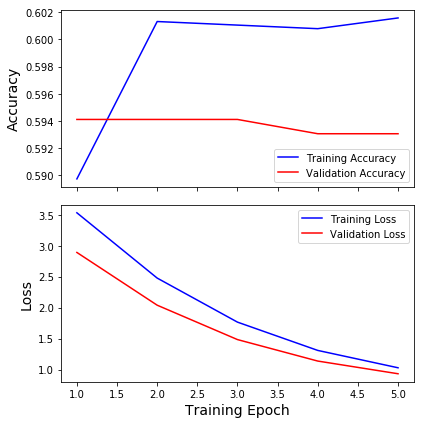



------------------------------------------------------------------------------------------
	EVALUATE MODEL:
------------------------------------------------------------------------------------------

- Evaluating Training Data:
4751/4751 [==============================] - 2s 338us/step
    - Accuracy:0.6001
    - Loss:0.9254

- Evaluating Test Data:
839/839 [==============================] - 0s 336us/step
    - Accuracy:0.5948
    - Loss:0.9314

------------------------------------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------------------------------------


index,precision,recall,f1-score,support
0,0.6667,0.0059,0.0116,341
1,0.5945,0.998,0.7451,498
macro avg,0.6306,0.5019,0.3784,839
micro avg,0.5948,0.5948,0.5948,839
weighted avg,0.6238,0.5948,0.447,839


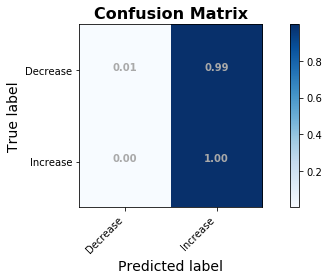

(          index  precision    recall  f1-score  support
 0             0   0.666667  0.005865  0.011628      341
 1             1   0.594498  0.997992  0.745127      498
 2     macro avg   0.630582  0.501929  0.378378      839
 3     micro avg   0.594756  0.594756  0.594756      839
 4  weighted avg   0.623830  0.594756  0.447007      839,
 <Figure size 576x288 with 2 Axes>)

In [19]:
evaluate_classification_model(model0,history0,
                              X_train, X_test, y_train, y_test)

# Other Functions

In [ ]:
def plot_auc_roc_curve(y_test, y_test_pred,figsize=(4,6)):
    """ Takes y_test and y_test_pred from a ML classification model and plots the AUC-ROC curve.
    ie.
    y_test_pred = clf.predict_proba(X_test)
    plot_auc_roc_curve(y_test, y_test_pred)
    """
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_auc_score, roc_curve
    import matplotlib.pyplot as plt
    
    auc = roc_auc_score(y_test, y_test_pred[:,1])

    FPr, TPr, _  = roc_curve(y_test, y_test_pred[:,1])
    
    fig = plt.figure(figsize=())
    plt.plot(FPr, TPr,label=f"AUC for CatboostClassifier:\n{round(auc,2)}" )

    plt.plot([0, 1], [0, 1],  lw=2,linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()